# Imports

In [190]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Load dataset

In [191]:

df = pd.read_csv('accent-mfcc-data-1.csv')

df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


# Drop target from dataset

In [192]:
X = df.drop(['language'], axis=1)

y = df["language"]

# Split dataset

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Decision Tree

#### Default

In [194]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.5596330275229358


#### Entropy

0.7339449541284404


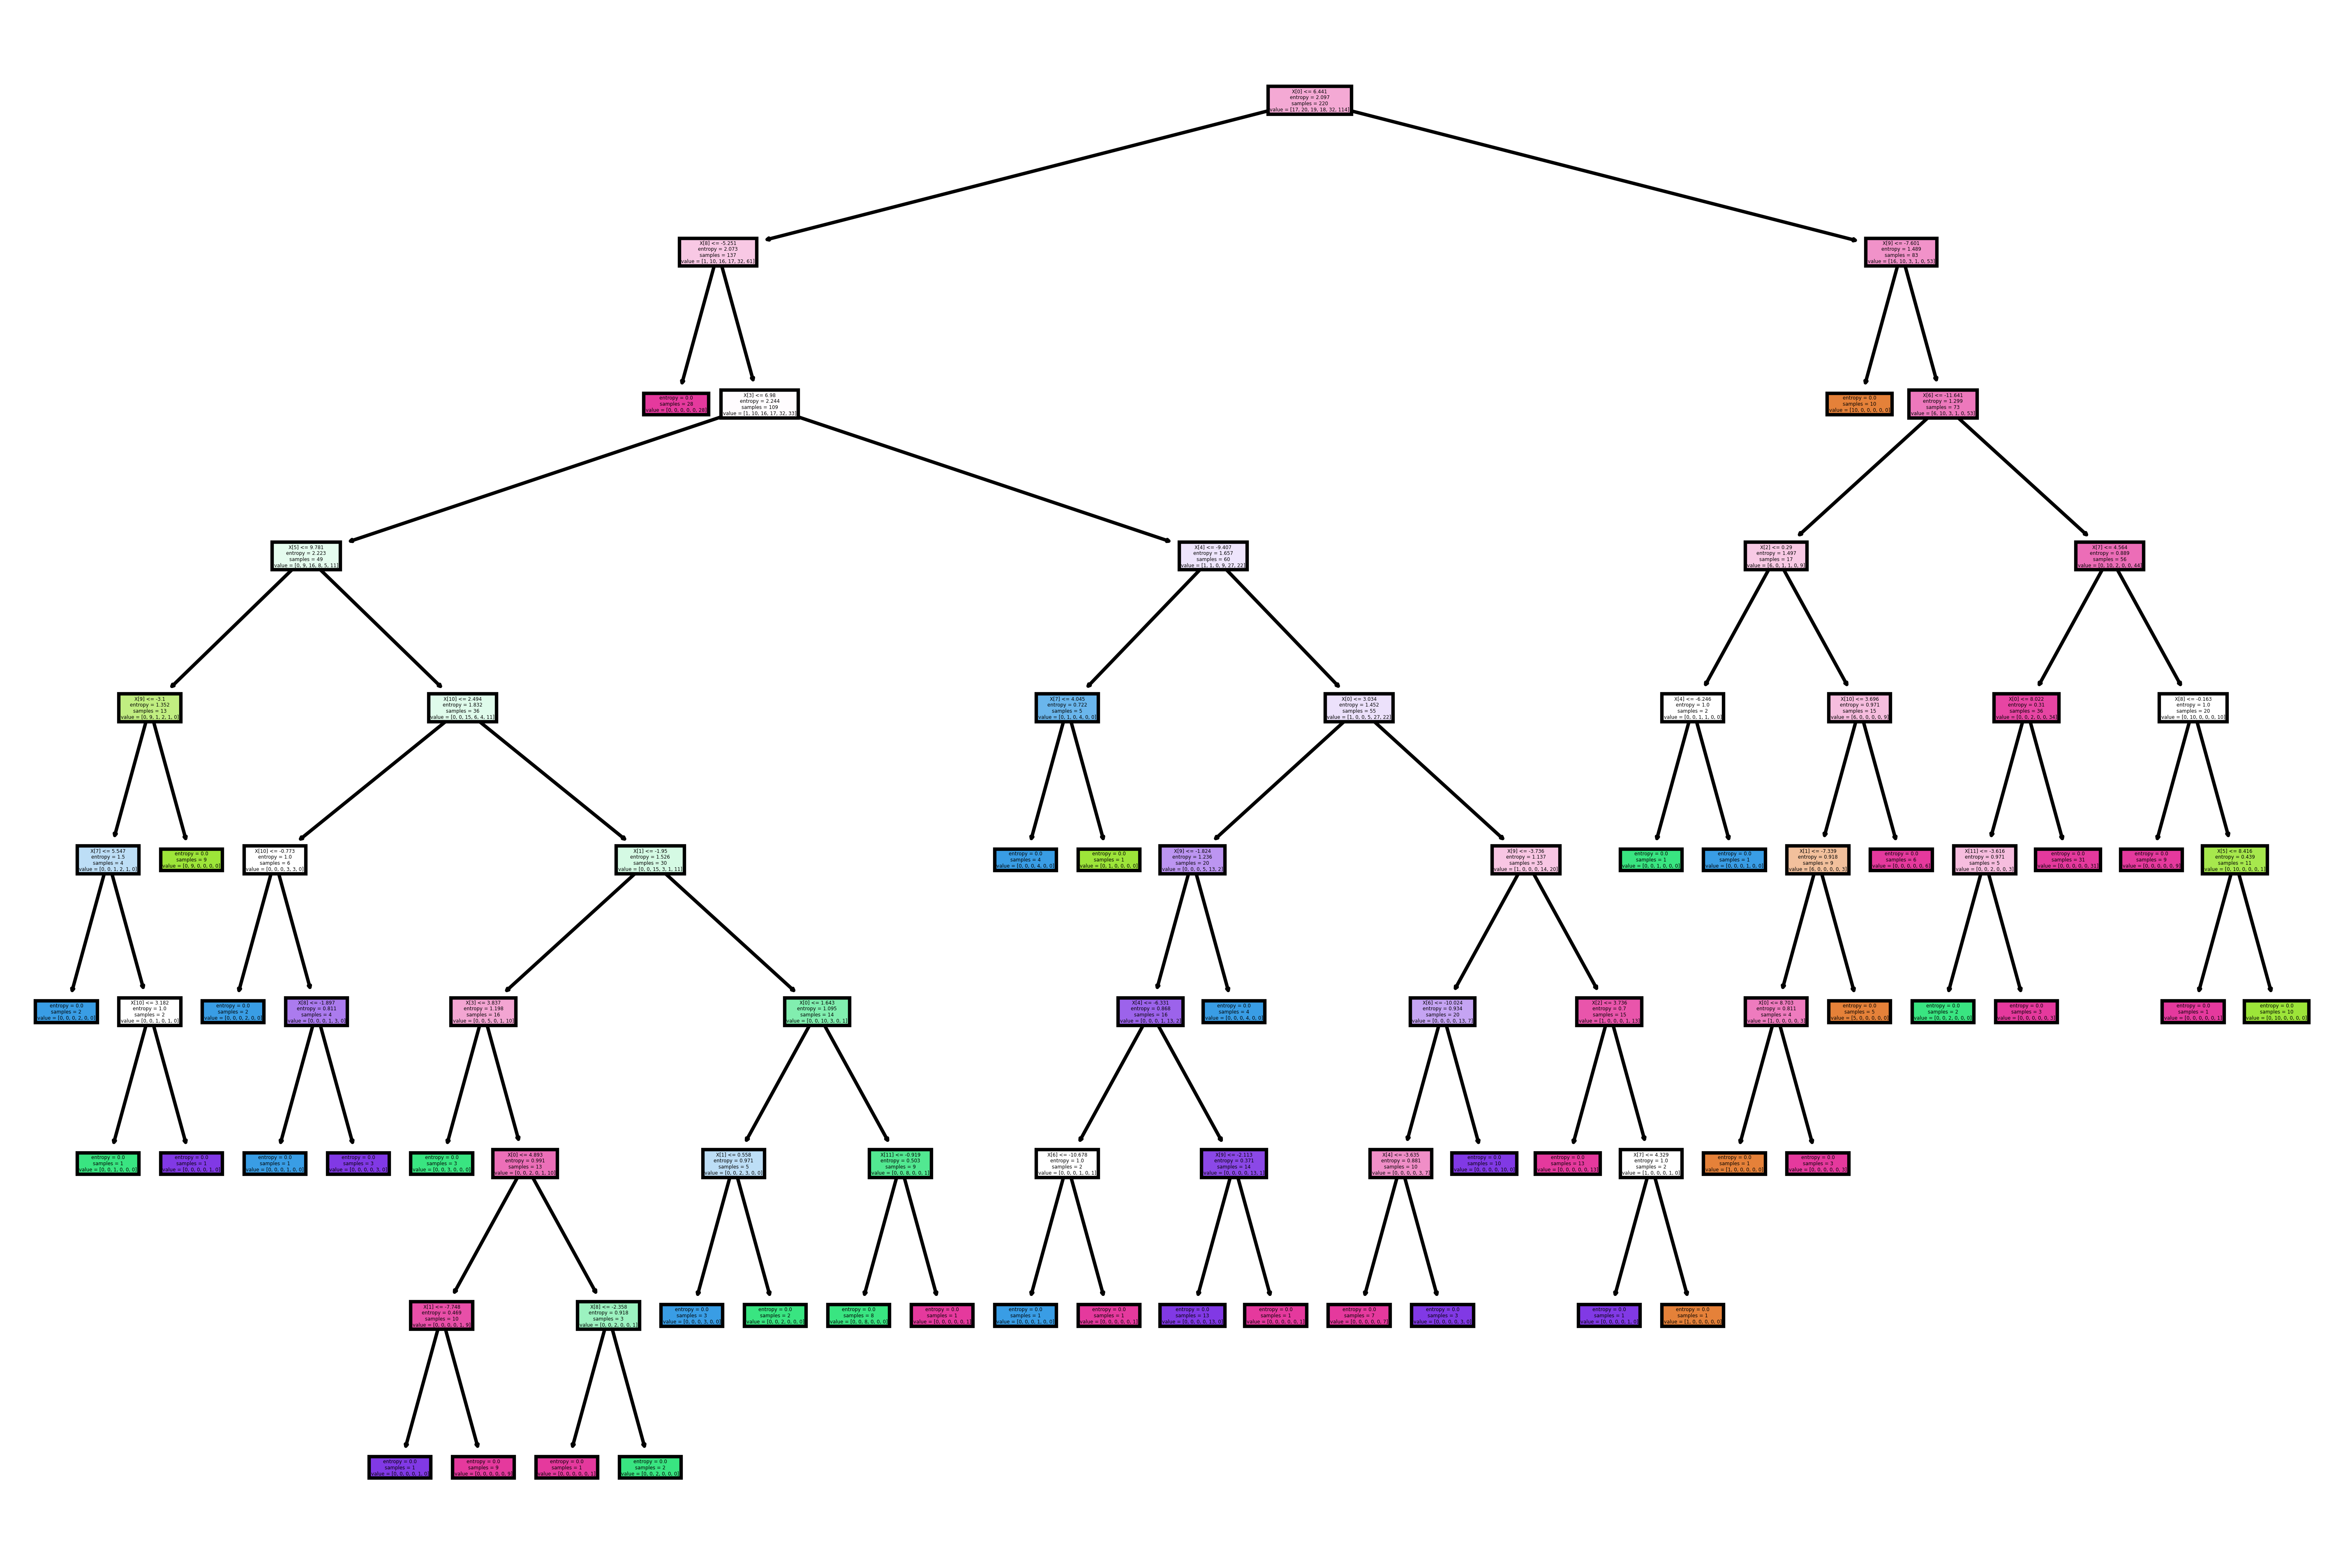

In [195]:
dtc = DecisionTreeClassifier(criterion="entropy")

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 8), dpi=600)

plot_tree(dtc, filled=True)

plt.show()


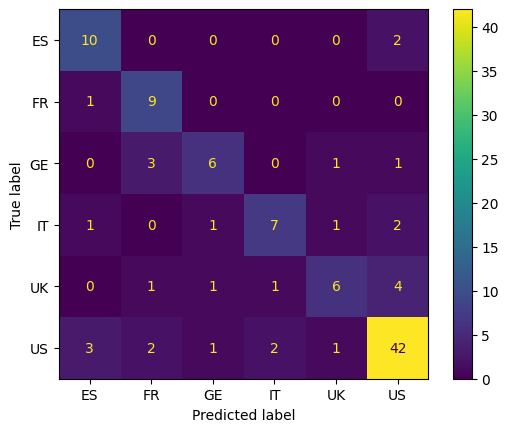

In [196]:
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred, y_true=y_test)


#### Other hyperparams

In [197]:
dtc = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=8, min_samples_split=4)

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.7064220183486238


Tried a bunch of different hyperparams. Messed with splitter, max_depth, and min_samples_split. Didn't see appreciable imporvement over jsut setting the criterion to entropy 

# Random Forest

#### Default

In [198]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.6972477064220184


#### Entropy

0.7889908256880734


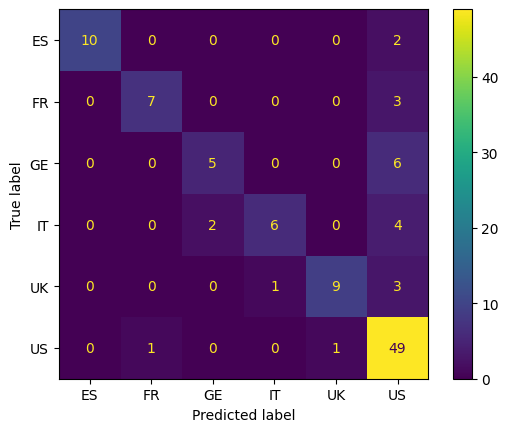

In [199]:
rfc = RandomForestClassifier(criterion="entropy")

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_pred=y_pred, y_true=y_test)


#### Other hyperparams

In [200]:
rfc = RandomForestClassifier(criterion="entropy", max_depth=4, min_samples_split=4, n_jobs=-1)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.6238532110091743


Sometimes the entropy model will predict much better, other times it's hardly better. Like the dtc messing with hyper params didn't make good imporvements.

# SVC

#### Default

In [201]:
svc = SVC()

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.5229357798165137


#### C

###### Finding the best C, takes a very long time... only run if really needed

In [202]:
a = 0.0
b = 0.0
for i in range(1,10000):
  svc = SVC(C=i)

  svc.fit(X_train, y_train)

  y_pred = svc.predict(X_test)

  acc = metrics.accuracy_score(y_test, y_pred)
  if acc > a:
    a = acc
    b = i

print(b)


49


0.8807339449541285


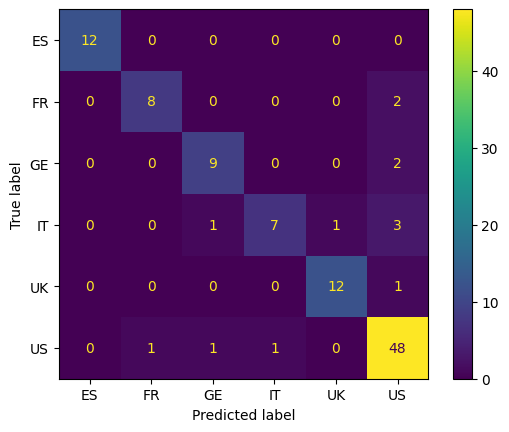

In [203]:
svc = SVC(C=49)  

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_pred=y_pred, y_true=y_test)

Incredible increase in acc! I didn't find a difinivite best value for C, but it increased SVM from being basically useless to the best results yet!

#### Other hyperparams

In [204]:
svc = SVC(C=15.0, kernel='poly', degree=7, gamma='auto')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.8073394495412844


No improvement with the other SVC hps

# KKN

#### Default

In [205]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.7798165137614679


In [206]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.7798165137614679


0.8073394495412844


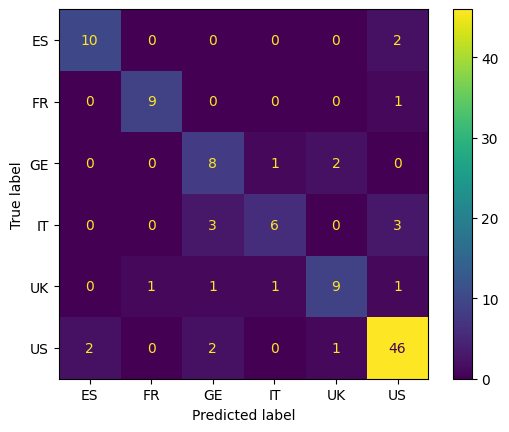

In [207]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_pred=y_pred, y_true=y_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


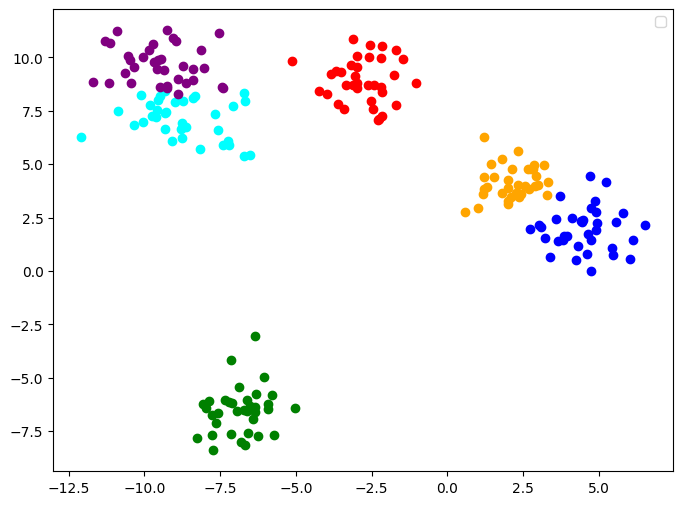

In [208]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import kneighbors_graph

X, y = make_blobs(n_samples=210, centers=6, random_state=42)

k = 5
A = kneighbors_graph(X, k)

# Define a list of color names
color_names = ['red', 'blue', 'green', 'cyan', 'orange', 'purple']
# accents = ['ES','FR','GE','IT','UK','US']

# Plot scatter plot with colored targets and labels
plt.figure(figsize=(8, 6))
for i in range(len(color_names)):
    plt.scatter(X[y==i, 0], X[y==i, 1], c=color_names[i], label=f'')
plt.legend()
plt.show()


setting weight to distance had a small improvement

# Naive Bayes


#### Default

0.5779816513761468


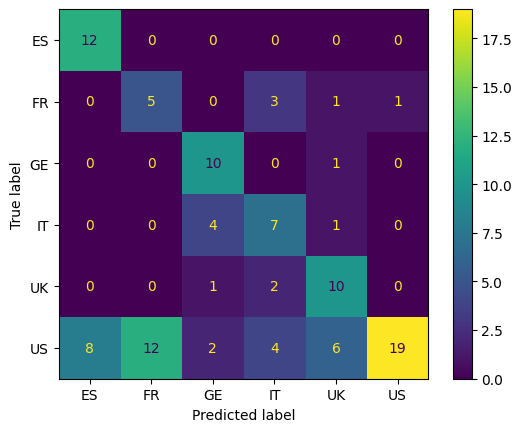

In [209]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_pred=y_pred, y_true=y_test)


# Boosting

0.7431192660550459


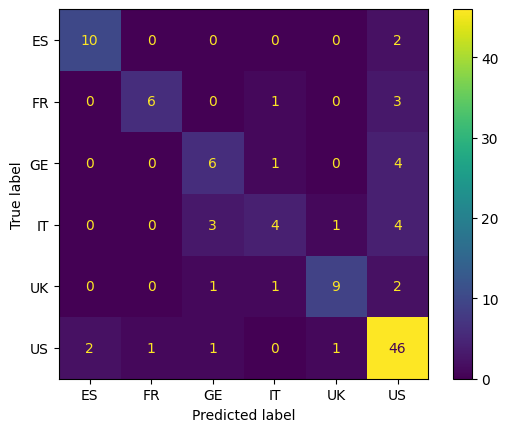

In [210]:
xbc = XGBClassifier()

y_train_int = []
for x in y_train:
    if (x == 'ES'):
        y_train_int.append(0)
    if (x == 'FR'):
        y_train_int.append(1)
    if (x == 'GE'):
        y_train_int.append(2)
    if (x == 'IT'):
        y_train_int.append(3)
    if (x == 'UK'):
        y_train_int.append(4)
    if (x == 'US'):
        y_train_int.append(5)

xbc.fit(X_train, y_train_int)

y_pred_int = xbc.predict(X_test)

y_pred_x = []
for x in y_pred_int:
    if (x == 0):
        y_pred_x.append('ES')
    if (x == 1):
        y_pred_x.append('FR')
    if (x == 2):
        y_pred_x.append('GE')
    if (x == 3):
        y_pred_x.append('IT')
    if (x == 4):
        y_pred_x.append('UK')
    if (x == 5):
        y_pred_x.append('US')

print(metrics.accuracy_score(y_test, y_pred_x))
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred_x, y_true=y_test)


0.6697247706422018


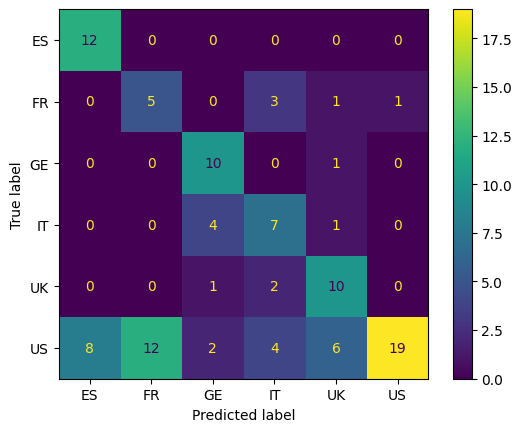

In [211]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

y_pred_g = gbc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_g))
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred, y_true=y_test)

Learning rate set to 0.073246
0:	learn: 1.7406465	total: 3.59ms	remaining: 3.59s
1:	learn: 1.6826723	total: 7.22ms	remaining: 3.6s
2:	learn: 1.6383362	total: 10.9ms	remaining: 3.61s
3:	learn: 1.5904554	total: 13.8ms	remaining: 3.43s
4:	learn: 1.5442704	total: 16.4ms	remaining: 3.26s
5:	learn: 1.5015445	total: 19.1ms	remaining: 3.17s
6:	learn: 1.4652588	total: 21.8ms	remaining: 3.08s
7:	learn: 1.4279433	total: 24.3ms	remaining: 3.01s
8:	learn: 1.3874590	total: 26.8ms	remaining: 2.95s
9:	learn: 1.3534082	total: 29.4ms	remaining: 2.91s
10:	learn: 1.3204791	total: 32ms	remaining: 2.87s
11:	learn: 1.2912053	total: 34.5ms	remaining: 2.84s
12:	learn: 1.2704641	total: 37ms	remaining: 2.81s
13:	learn: 1.2433651	total: 39.5ms	remaining: 2.78s
14:	learn: 1.2224440	total: 42ms	remaining: 2.76s
15:	learn: 1.1985978	total: 44.5ms	remaining: 2.74s
16:	learn: 1.1754296	total: 47.1ms	remaining: 2.72s
17:	learn: 1.1550086	total: 49.6ms	remaining: 2.71s
18:	learn: 1.1315756	total: 52.2ms	remaining: 2.69s

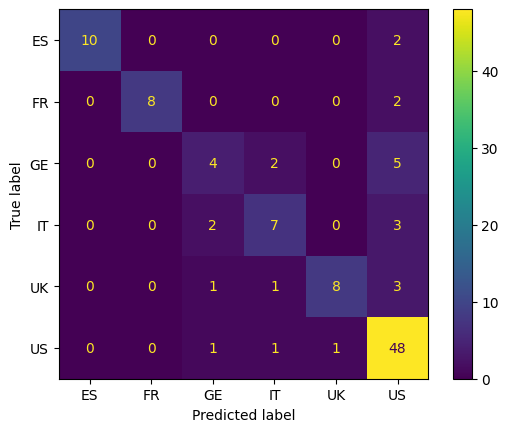

In [212]:
cbc = CatBoostClassifier()

cbc.fit(X_train, y_train)

y_pred_c = cbc.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_c))
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred_c, y_true=y_test)

Had issues trying to install lightgbm

In [213]:
# xbc, gbc, cbc VOTING
most_common_list = []
i = 0
for x in y_test:
    values = [x, y_pred_x[i], y_pred_c[i][0], y_pred_g[i]]
    most_common = max(set(values), key=values.count)
    most_common_list.append(most_common)
    i += 1
print(metrics.accuracy_score(y_test, most_common_list))

0.7798165137614679


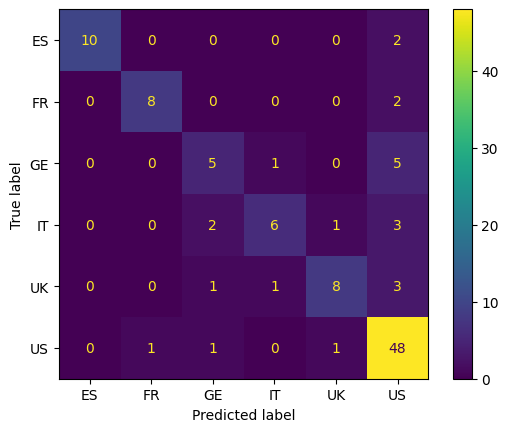

In [214]:
ConfusionMatrixDisplay.from_predictions(y_pred=most_common_list, y_true=y_test)
